<a href="https://colab.research.google.com/github/gm-0liveira/Estudos-Pandas/blob/main/desbravando_pandas_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy import text

In [ ]:
# Criando uma engine de conexão com sqlalchemy
engine = sqlalchemy.create_engine('sqlite:////content/data/database.db')

In [ ]:
# Criando o pedido de execução de uma query no banco de dados local
with engine.begin() as conn:
    query = text("""SELECT * FROM produto""")
    df_produto = pd.read_sql_query(query, conn)

In [ ]:
df_produto

,descItem,vlPreco
0,abacate,5.25
1,abacaxi,2.50
2,abobrinha,2.00
3,alcaparra,3.00
4,alho,1.00
...,...,...
80,tomate,1.50
81,tomate seco,6.25
82,uva passa,3.75
83,vinho tinto,12.00


In [ ]:
# Passando mais informações como filtros na query sql
with engine.begin() as conn:
    query = text("""
    SELECT *

    FROM item_pedido AS t1

    LEFT JOIN produto AS t2
    ON t1.descItem = t2.descItem
    """)
    df_item_pedido_preco = pd.read_sql_query(query, conn)

In [ ]:
df_item_pedido_preco

,idPedido,descTipoItem,descItem,descItem,vlPreco
0,0,bebida,refrigerante,refrigerante,7.25
1,0,borda,borda tradicional,borda tradicional,0.00
2,0,ingrediente 1,pepperoni,pepperoni,3.50
3,0,ingrediente 2,orégano,orégano,1.00
4,0,ingrediente 3,frango,frango,3.50
...,...,...,...,...,...
10479,1105,ingrediente 4,orégano,orégano,1.00
10480,1105,ingrediente 5,carne seca,carne seca,5.00
10481,1105,massa,massa tradicional,massa tradicional,9.25
10482,1105,queijo 1,mussarela,mussarela,6.00


In [ ]:
# Criando uma função que retorna os dados de um arquivo sql com base em seu caminho
def import_query(path):
  with open(path, 'r') as open_file:
    query = open_file.read()
  return query

In [ ]:
# Utilizando a função import_query passando o caminho da query no ambiente de execução
query = import_query('/content/data/pedido_item_preco.sql')
print(query)

SELECT *

FROM item_pedido AS t1

LEFT JOIN produto AS t2
ON t1.descItem = t2.descItem

WHERE descTipoItem like '%massa%'


In [ ]:
# Executando o comando sql no banco de dados
with engine.begin() as conn:
    query = text(import_query('/content/data/pedido_item_preco.sql'))
    df = pd.read_sql_query(query, conn)
df

,idPedido,descTipoItem,descItem,descItem,vlPreco
0,0,massa,massa final,massa final,7.00
1,1,massa,massa tradicional,massa tradicional,9.25
2,2,massa,massa final,massa final,7.00
3,3,massa,massa tradicional,massa tradicional,9.25
4,4,massa,massa grossa,massa grossa,12.00
...,...,...,...,...,...
1101,1101,massa,massa tradicional,massa tradicional,9.25
1102,1102,massa,massa tradicional,massa tradicional,9.25
1103,1103,massa,massa final,massa final,7.00
1104,1104,massa,massa tradicional,massa tradicional,9.25


In [ ]:
# Criando uma query com os comandos do arquivo qtde_pedidos_estado.sql e executando no banco de dados
with engine.begin() as conn:
    query = text(import_query('/content/data/qtde_pedidos_estado.sql'))
    df_pedido_estado = pd.read_sql_query(query, conn)
df_pedido_estado

,descUF,qtdePedido
0,Acre,2
1,Alagoas,12
2,Amapá,1
3,Amazonas,4
4,Bahia,43
5,Ceará,44
6,Distrito Federal,33
7,Espírito Santo,32
8,Goiás,35
9,Maranhão,8


<Axes: >

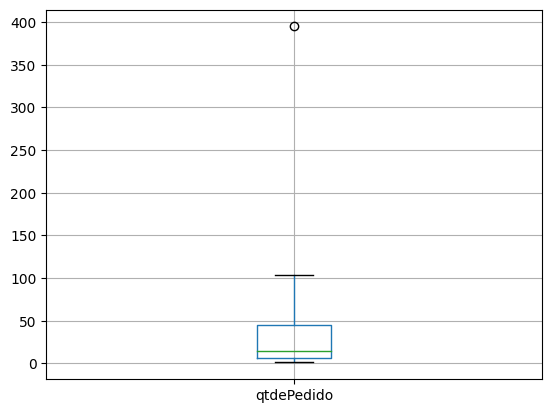

In [ ]:
# Criando um boxplot com os dados da coluna qtdePedido
df_pedido_estado.boxplot('qtdePedido')

In [ ]:
# Ordenando os dados do dataframe df_pedido_estado e selecionando apenas os 5 primeiros
top5_uf = (df_pedido_estado.sort_values('qtdePedido', ascending=False)
                           .head(5))
top5_uf

,descUF,qtdePedido
25,São Paulo,395
20,Rio de Janeiro,103
12,Minas Gerais,92
13,Paraná,76
19,Rio Grande do Sul,50


In [ ]:
# Salvando as alterações no banco de dados
top5_uf.to_sql('top5_uf_pedido', engine, if_exists='replace')

5